# Credit Risk Prediction

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('credit_risk_dataset.csv')

In [4]:
df.head(2)

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_income,person_age,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_percent_income,loan_status
0,RENT,PERSONAL,D,Y,59000,22,123.0,35000,16.02,3,0.59,1
1,OWN,EDUCATION,B,N,9600,21,5.0,1000,11.14,0,0.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_home_ownership       32581 non-null  object 
 1   loan_intent                 32581 non-null  object 
 2   loan_grade                  32581 non-null  object 
 3   cb_person_default_on_file   32581 non-null  object 
 4   person_income               32581 non-null  int64  
 5   person_age                  32581 non-null  int64  
 6   person_emp_length           31686 non-null  float64
 7   loan_amnt                   32581 non-null  int64  
 8   loan_int_rate               29465 non-null  float64
 9   cb_person_cred_hist_length  32581 non-null  int64  
 10  loan_percent_income         32581 non-null  float64
 11  loan_status                 32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file', 'person_income', 'person_age',
       'person_emp_length', 'loan_amnt', 'loan_int_rate',
       'cb_person_cred_hist_length', 'loan_percent_income', 'loan_status'],
      dtype='object')

###  Feature Descriptions

1. **`person_age`**  
   Age of the individual applying for the loan.

2. **`person_income`**  
   Annual income of the individual.

3. **`person_home_ownership`**  
   Type of home ownership of the individual:
   - **`rent`**: The individual is currently renting a property.  
   - **`mortgage`**: The individual has a mortgage on the property they own.  
   - **`own`**: The individual owns their home outright.  
   - **`other`**: Other categories of home ownership that may be specific to the dataset.

4. **`person_emp_length`**  
   Employment length of the individual in years.

5. **`loan_intent`**  
   The intent behind the loan application.

6. **`loan_grade`**  
   The grade assigned to the loan based on the creditworthiness of the borrower:
   - **`A`**: High creditworthiness; low risk.  
   - **`B`**: Relatively low-risk.  
   - **`C`**: Moderate creditworthiness.  
   - **`D`**: Higher risk than previous grades.  
   - **`E`**: Lower creditworthiness; higher risk.  
   - **`F`**: Significant credit risk.  
   - **`G`**: Lowest creditworthiness; highest risk.

7. **`loan_amnt`**  
   The loan amount requested by the individual.

8. **`loan_int_rate`**  
   The interest rate associated with the loan.

9. **`loan_status`**  
   Loan repayment status:
   - **`0`**: Non-default – Loan repaid successfully.  
   - **`1`**: Default – Borrower failed to repay the loan.

10. **`loan_percent_income`**  
    The proportion of an individual's income being used to repay the loan.

11. **`cb_person_default_on_file`**  
    Historical default information from the credit bureau:
    - **`Y`**: History of defaults.  
    - **`N`**: No default history.

12. **`cb_person_cred_hist_length`**  
    The length of credit history for the individual (in years).


In [7]:
df.describe()

,person_income,person_age,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_percent_income,loan_status
count,3.258100e+04,32581.000000,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,6.607485e+04,27.719254,4.789686,9589.371106,11.011695,1.030509,0.170203,0.218164
std,6.198312e+04,6.206590,4.142630,6322.086646,3.240459,2.806561,0.106782,0.413006
min,4.000000e+03,20.000000,0.000000,500.000000,5.420000,0.000000,0.000000,0.000000
25%,3.850000e+04,23.000000,2.000000,5000.000000,7.900000,0.000000,0.090000,0.000000
50%,5.500000e+04,26.000000,4.000000,8000.000000,10.990000,0.000000,0.150000,0.000000
75%,7.920000e+04,30.000000,7.000000,12200.000000,13.470000,0.000000,0.230000,0.000000
max,6.000000e+06,94.000000,123.000000,35000.000000,23.220000,30.000000,0.830000,1.000000


In [8]:
df.shape

(32581, 12)

In [9]:
df.nunique()

person_home_ownership            4
loan_intent                      6
loan_grade                       7
cb_person_default_on_file        2
person_income                 4295
person_age                      56
person_emp_length               36
loan_amnt                      753
loan_int_rate                  348
cb_person_cred_hist_length      30
loan_percent_income             77
loan_status                      2
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(552)

In [11]:
df.drop_duplicates()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_income,person_age,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_percent_income,loan_status
0,RENT,PERSONAL,D,Y,59000,22,123.0,35000,16.02,3,0.59,1
1,OWN,EDUCATION,B,N,9600,21,5.0,1000,11.14,0,0.10,0
2,MORTGAGE,MEDICAL,C,N,9600,25,1.0,5500,12.87,0,0.57,1
3,RENT,MEDICAL,C,N,65500,23,4.0,35000,15.23,0,0.53,1
4,RENT,MEDICAL,C,Y,54400,24,8.0,35000,14.27,4,0.55,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32571,RENT,VENTURE,B,N,45600,60,1.0,20000,10.00,0,0.44,1
32574,RENT,PERSONAL,D,Y,65004,52,4.0,20000,15.58,19,0.31,1
32575,RENT,EDUCATION,B,N,64500,52,0.0,5000,11.26,0,0.08,0
32576,MORTGAGE,PERSONAL,C,N,53000,57,1.0,5800,13.16,0,0.11,0


In [12]:
max_age = df["person_age"].max()
min_age = df["person_age"].min()

print(f"maximum Age {max_age}")
print(f"minimum Age {min_age}")

# people with an age between x and y
def age_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = df['person_age'].between(next,arr[i+1]).sum()
        print(f'Age between {next} and {arr[i+1]}: Number of people {num_people}')
        
age_group([19, 26, 36, 46, 56, 66, 76, 86, 96])

maximum Age 94
minimum Age 20
Age between 20 and 26: Number of people 17831
Age between 27 and 36: Number of people 11834
Age between 37 and 46: Number of people 2363
Age between 47 and 56: Number of people 434
Age between 57 and 66: Number of people 98
Age between 67 and 76: Number of people 17
Age between 77 and 86: Number of people 3
Age between 87 and 96: Number of people 1


The majority of individuals seeking loans are relatively young, with over 15,000 applicants aged between 20 and 26. Conversely, there is a notable decline in the number of applicants as age increases, with only a few applicants aged 77 to 86 and aged 87 to 96.Given that there are only four individuals aged greater than 76 years, their presence may introduce bias into the dataset. Therefore, it would be advisable to remove them.

In [13]:
max_ = df['person_income'].max()
min_ = df['person_income'].min()

print(f"maximum Income {max_}")
print(f"minimum Income {min_}")

#people with an income between x and y
def income_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = df['person_income'].between(next,arr[i+1]).sum()
        print(f'Income between {next} and {arr[i+1]}: Number of people {num_people}')
        
income_group([0, 25000, 50000, 75000, 100000,float('inf')])

maximum Income 6000000
minimum Income 4000
Income between 1 and 25000: Number of people 2469
Income between 25001 and 50000: Number of people 11613
Income between 50001 and 75000: Number of people 9622
Income between 75001 and 100000: Number of people 4670
Income between 100001 and inf: Number of people 4207


The income distribution of loan applicants shows a majority earning between 25,000
50,000, with 10,144 individuals falling within this bracket. There is a gradual decrease in the number of applicants as income increases, with fewer applicants earning below 
25,000 and above 75,000.

In [14]:
max_loan_amount = df['loan_amnt'].max()
min_loan_amount = df['loan_amnt'].min()

print(f"maximum Loan Amount {max_loan_amount}")
print(f"minimum Loan Amount {min_loan_amount}")

# people with an income between x and y
def loan_amount_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = df['loan_amnt'].between(next,arr[i+1]).sum()
        print(f'Loan Amount between {next} and {arr[i+1]}: Number of people {num_people}')
        
loan_amount_group([0, 5000, 10000, 15000, float('inf')])

maximum Loan Amount 35000
minimum Loan Amount 500
Loan Amount between 1 and 5000: Number of people 9489
Loan Amount between 5001 and 10000: Number of people 12040
Loan Amount between 10001 and 15000: Number of people 6123
Loan Amount between 15001 and inf: Number of people 4929


The loan amount distribution reveals a significant portion of applicants seeking loans between 5,001 and 
10,000, with 10,565 individuals falling within this range. There is a gradual decline in the number of applicants as loan amounts increase beyond 
10,000 with minimum amount of 500 and a maximum loan amount of $35,000.

In [15]:
df.isnull().sum()

person_home_ownership            0
loan_intent                      0
loan_grade                       0
cb_person_default_on_file        0
person_income                    0
person_age                       0
person_emp_length              895
loan_amnt                        0
loan_int_rate                 3116
cb_person_cred_hist_length       0
loan_percent_income              0
loan_status                      0
dtype: int64

In [16]:
df.groupby('loan_intent')['loan_int_rate'].mean()

loan_intent
DEBTCONSOLIDATION    10.983268
EDUCATION            10.950261
HOMEIMPROVEMENT      11.201152
MEDICAL              11.060194
PERSONAL             10.998221
VENTURE              10.948275
Name: loan_int_rate, dtype: float64

In [17]:
df["loan_int_rate"].fillna(df["loan_int_rate"].mean(), inplace = True )

C:\Users\acer\AppData\Local\Temp\ipykernel_9452\1019855083.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["loan_int_rate"].fillna(df["loan_int_rate"].mean(), inplace = True )


In [18]:
df.groupby('loan_intent')['loan_int_rate'].transform('mean')

0        10.999458
1        10.955964
2        11.055241
3        11.055241
4        11.055241
           ...    
32576    10.999458
32577    10.999458
32578    11.184597
32579    10.999458
32580    11.055241
Name: loan_int_rate, Length: 32581, dtype: float64

In [19]:
pel_fill = round(df.groupby('loan_intent')['person_emp_length'].mean(), 2)
pel_fill

loan_intent
DEBTCONSOLIDATION    4.76
EDUCATION            4.46
HOMEIMPROVEMENT      5.13
MEDICAL              4.77
PERSONAL             4.89
VENTURE              4.89
Name: person_emp_length, dtype: float64

In [20]:
mean_emp_length_by_intent = df.groupby('loan_intent')['person_emp_length'].transform('mean')

# Fill null values with the mean 'person_emp_length' for each 'loan_intent' category
df['person_emp_length'] = df['person_emp_length'].fillna(mean_emp_length_by_intent)

# Round the values to 2 decimal places
df['person_emp_length'] = df['person_emp_length'].round(2)

In [21]:
df

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_income,person_age,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_percent_income,loan_status
0,RENT,PERSONAL,D,Y,59000,22,123.0,35000,16.02,3,0.59,1
1,OWN,EDUCATION,B,N,9600,21,5.0,1000,11.14,0,0.10,0
2,MORTGAGE,MEDICAL,C,N,9600,25,1.0,5500,12.87,0,0.57,1
3,RENT,MEDICAL,C,N,65500,23,4.0,35000,15.23,0,0.53,1
4,RENT,MEDICAL,C,Y,54400,24,8.0,35000,14.27,4,0.55,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,MORTGAGE,PERSONAL,C,N,53000,57,1.0,5800,13.16,0,0.11,0
32577,MORTGAGE,PERSONAL,A,N,120000,54,4.0,17625,7.49,0,0.15,0
32578,RENT,HOMEIMPROVEMENT,B,N,76000,65,3.0,35000,10.99,0,0.46,1
32579,MORTGAGE,PERSONAL,B,N,150000,56,5.0,15000,11.48,0,0.10,0


In [22]:
df['loan_status'].value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [23]:
df[df['person_age'] > 75]

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_income,person_age,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_percent_income,loan_status
32355,RENT,MEDICAL,A,N,48000,78,41.0,3000,7.510000,0,0.06,0
32416,RENT,MEDICAL,C,N,24000,94,1.0,6500,11.011695,0,0.27,0
32422,RENT,MEDICAL,B,N,64000,80,7.0,6800,11.710000,0,0.11,0
32506,MORTGAGE,PERSONAL,A,N,94800,84,2.0,10000,7.510000,0,0.11,0
32534,RENT,MEDICAL,A,N,75000,76,23.0,15000,8.940000,0,0.20,0


In [24]:
df = df[df['person_age'] <= 75]

In [25]:
df

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_income,person_age,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_percent_income,loan_status
0,RENT,PERSONAL,D,Y,59000,22,123.0,35000,16.02,3,0.59,1
1,OWN,EDUCATION,B,N,9600,21,5.0,1000,11.14,0,0.10,0
2,MORTGAGE,MEDICAL,C,N,9600,25,1.0,5500,12.87,0,0.57,1
3,RENT,MEDICAL,C,N,65500,23,4.0,35000,15.23,0,0.53,1
4,RENT,MEDICAL,C,Y,54400,24,8.0,35000,14.27,4,0.55,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,MORTGAGE,PERSONAL,C,N,53000,57,1.0,5800,13.16,0,0.11,0
32577,MORTGAGE,PERSONAL,A,N,120000,54,4.0,17625,7.49,0,0.15,0
32578,RENT,HOMEIMPROVEMENT,B,N,76000,65,3.0,35000,10.99,0,0.46,1
32579,MORTGAGE,PERSONAL,B,N,150000,56,5.0,15000,11.48,0,0.10,0


In [26]:
df.drop(index = df[df['person_emp_length'] > 40].index, inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_9452\2592518451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index = df[df['person_emp_length'] > 40].index, inplace=True)


In [27]:
df

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_income,person_age,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_percent_income,loan_status
1,OWN,EDUCATION,B,N,9600,21,5.0,1000,11.14,0,0.10,0
2,MORTGAGE,MEDICAL,C,N,9600,25,1.0,5500,12.87,0,0.57,1
3,RENT,MEDICAL,C,N,65500,23,4.0,35000,15.23,0,0.53,1
4,RENT,MEDICAL,C,Y,54400,24,8.0,35000,14.27,4,0.55,1
5,OWN,VENTURE,A,N,9900,21,2.0,2500,7.14,0,0.25,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,MORTGAGE,PERSONAL,C,N,53000,57,1.0,5800,13.16,0,0.11,0
32577,MORTGAGE,PERSONAL,A,N,120000,54,4.0,17625,7.49,0,0.15,0
32578,RENT,HOMEIMPROVEMENT,B,N,76000,65,3.0,35000,10.99,0,0.46,1
32579,MORTGAGE,PERSONAL,B,N,150000,56,5.0,15000,11.48,0,0.10,0


In [28]:
df["cb_person_default_on_file"].value_counts(1)

cb_person_default_on_file
N    0.823663
Y    0.176337
Name: proportion, dtype: float64

In [29]:
col_list = ['person_age',#
 'person_income',#
 'person_home_ownership',#
 'person_emp_length',#
 'loan_intent', #
 'loan_grade',#
 'loan_amnt',#
 'loan_int_rate',#
 'loan_status',#
 'loan_percent_income',#
 'cb_person_default_on_file',#
 'cb_person_cred_hist_length',
'age_group','income_group','loan_amount_group']

scale_cols = ['person_income','person_age','person_emp_length', 'loan_amnt','loan_int_rate','cb_person_cred_hist_length','loan_percent_income','loan_to_income_ratio', 'loan_to_emp_length_ratio',
       'int_rate_to_loan_amt_ratio']
ohe_colums = ['loan_grade', 'person_home_ownership','loan_intent']
ord_col = ["cb_person_default_on_file"]

In [30]:
X = df.drop(columns = ['loan_status'])
y = df['loan_status']

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25,random_state = 12, stratify = y)

In [32]:
df.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_income,person_age,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_percent_income,loan_status
1,OWN,EDUCATION,B,N,9600,21,5.0,1000,11.14,0,0.10,0
2,MORTGAGE,MEDICAL,C,N,9600,25,1.0,5500,12.87,0,0.57,1
3,RENT,MEDICAL,C,N,65500,23,4.0,35000,15.23,0,0.53,1
4,RENT,MEDICAL,C,Y,54400,24,8.0,35000,14.27,4,0.55,1
5,OWN,VENTURE,A,N,9900,21,2.0,2500,7.14,0,0.25,1


## Applying One Hot Encoder on categorical columns which have more than 2 category

In [33]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")

# Fit and transform using a DataFrame
temp_X_train = pd.DataFrame(ohe.fit_transform(X_train[ohe_colums]), columns=ohe.get_feature_names_out(ohe_colums), index=X_train.index)
temp_X_test = pd.DataFrame(ohe.transform(X_test[ohe_colums]), columns=ohe.get_feature_names_out(ohe_colums), index=X_test.index)

# Concatenate the one-hot encoded features back to the original DataFrames
X_train = pd.concat([X_train, temp_X_train], axis=1)
X_test = pd.concat([X_test, temp_X_test], axis=1)

In [34]:
X_train.sample(10)

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file,person_income,person_age,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
29716,RENT,VENTURE,B,N,35496,37,5.0,3600,10.37,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
26254,MORTGAGE,VENTURE,C,N,99996,27,0.0,3000,12.84,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20772,RENT,PERSONAL,B,N,41000,29,3.0,5000,11.49,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6296,RENT,EDUCATION,C,Y,33276,23,4.0,6000,11.03,4,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
17100,RENT,PERSONAL,B,N,51000,26,10.0,5000,12.42,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
27076,MORTGAGE,EDUCATION,A,N,120000,28,0.0,1000,7.12,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
18003,MORTGAGE,MEDICAL,A,N,200000,31,3.0,30000,8.90,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
12179,RENT,MEDICAL,A,N,26000,24,5.0,12000,7.90,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
24230,OTHER,PERSONAL,B,N,70000,29,1.0,5000,11.14,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30187,MORTGAGE,VENTURE,A,N,48000,36,17.0,10000,9.63,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [35]:
X_train.drop(columns = ohe_colums, inplace = True)
X_test.drop(columns = ohe_colums, inplace = True)

In [36]:
X_train.sample(5)

,cb_person_default_on_file,person_income,person_age,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,loan_percent_income,loan_grade_A,loan_grade_B,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
13782,Y,33000,21,2.0,11000,13.110000,3,0.33,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2372,N,37000,22,2.0,2500,17.490000,0,0.07,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4344,N,26400,21,5.0,4750,12.230000,0,0.18,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
26690,N,110000,30,14.0,25000,10.360000,0,0.23,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
22794,N,58000,30,2.0,13200,11.011695,0,0.23,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Applying Ordinal Encoder on a categorical column which have only 2 category

In [37]:
from sklearn.preprocessing import OrdinalEncoder

ore = OrdinalEncoder()

X_train["cb_person_default_on_file"] = ore.fit_transform(X_train[["cb_person_default_on_file"]])
X_test["cb_person_default_on_file"] = ore.transform(X_test[["cb_person_default_on_file"]])

In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24430 entries, 9373 to 9304
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   cb_person_default_on_file       24430 non-null  float64
 1   person_income                   24430 non-null  int64  
 2   person_age                      24430 non-null  int64  
 3   person_emp_length               24430 non-null  float64
 4   loan_amnt                       24430 non-null  int64  
 5   loan_int_rate                   24430 non-null  float64
 6   cb_person_cred_hist_length      24430 non-null  int64  
 7   loan_percent_income             24430 non-null  float64
 8   loan_grade_A                    24430 non-null  float64
 9   loan_grade_B                    24430 non-null  float64
 10  loan_grade_C                    24430 non-null  float64
 11  loan_grade_D                    24430 non-null  float64
 12  loan_grade_E                    244

In [39]:
y_train.value_counts(normalize=True)

loan_status
0    0.781826
1    0.218174
Name: proportion, dtype: float64

Due to the highly imbalanced nature of our data, we will utilize the Synthetic Minority Over-sampling Technique (SMOTE) to address this issue. Currently, the ratio between the majority and minority classes is 78:22. 

In [40]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy={1: 10000}, random_state=3)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [41]:
y_train_resampled.value_counts(1)

loan_status
0    0.656357
1    0.343643
Name: proportion, dtype: float64

In [42]:
X_train_resampled.duplicated().sum()

np.int64(332)

In [43]:
drop_index = X_train_resampled[X_train_resampled.duplicated()].index

In [44]:
X_train_resampled.drop(index = drop_index, inplace = True)
y_train_resampled.drop(index = drop_index, inplace = True)

In [45]:
y_train_resampled.value_counts(1)

loan_status
0    0.65479
1    0.34521
Name: proportion, dtype: float64

## Standardation

In [46]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_scaled= pd.DataFrame(std.fit_transform(X_train_resampled), columns=X_train_resampled.columns, index= X_train_resampled.index)
X_test_scaled= pd.DataFrame(std.transform(X_test), columns=X_test.columns, index= X_test.index)

In [47]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns

lrg = LogisticRegression(max_iter=1000, random_state=12)
lrg.fit(X_train_resampled,y_train_resampled)

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=12)

In [48]:
y_pred_lrg = lrg.predict(X_test)

In [49]:
def confusion(y_test, y_pred):
    sns.set_theme(style= "whitegrid")
    plt.rcParams["figure.figsize"] = [5,3]
    plt.rcParams["figure.autolayout"] = True
    data = confusion_matrix(y_test,y_pred)
    df_cm = pd.DataFrame(data)
    df_cm.index.name = "Actual"
    df_cm.columns.name = "Predicted"
    cm = sns.heatmap(df_cm,annot=True, fmt="g")
    cm.plot()

Accuracy on train data 0.8043312013348165
Accuracy on test data 0.8320235756385069
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      6367
           1       0.62      0.59      0.61      1777

    accuracy                           0.83      8144
   macro avg       0.75      0.75      0.75      8144
weighted avg       0.83      0.83      0.83      8144



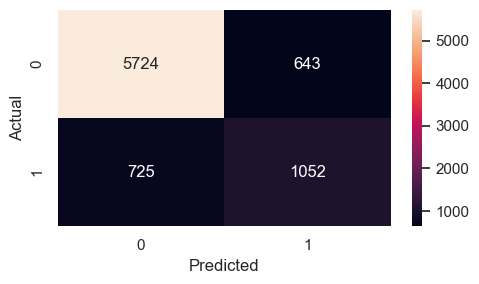

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd

print(f"Accuracy on train data {lrg.score(X_train_resampled, y_train_resampled)}")
print(f"Accuracy on test data {lrg.score(X_test, y_test)}")

print(classification_report(y_test, y_pred_lrg))
confusion(y_test, y_pred_lrg)

## Before smote

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on train data 0.8483012689316414
Accuracy on test data 0.8458988212180747
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      6367
           1       0.74      0.45      0.56      1777

    accuracy                           0.85      8144
   macro avg       0.80      0.70      0.73      8144
weighted avg       0.84      0.85      0.83      8144



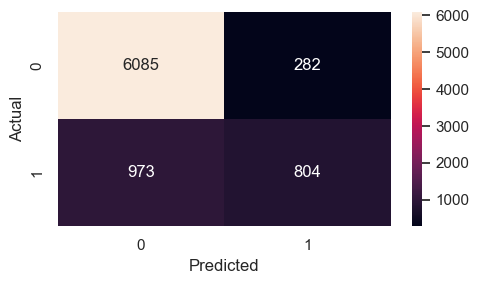

In [51]:
from sklearn.linear_model import LogisticRegression

lrg = LogisticRegression(max_iter=1000, random_state=12)

lrg.fit(X_train, y_train)
y_pred_lrg = lrg.predict(X_test)

print(f"Accuracy on train data {lrg.score(X_train, y_train)}")
print(f"Accuracy on test data {lrg.score(X_test, y_test)}")

print(classification_report(y_test, y_pred_lrg))
confusion(y_test, y_pred_lrg)

## After SMOTE

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy on train data 0.8043312013348165
Accuracy on test data 0.8320235756385069
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      6367
           1       0.62      0.59      0.61      1777

    accuracy                           0.83      8144
   macro avg       0.75      0.75      0.75      8144
weighted avg       0.83      0.83      0.83      8144



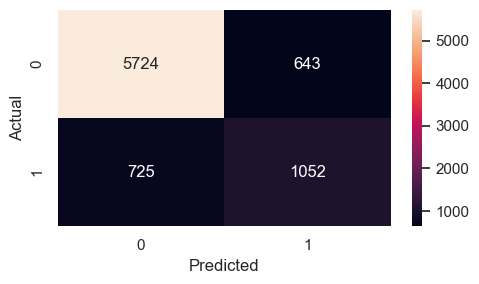

In [52]:
from sklearn.linear_model import LogisticRegression

lrg = LogisticRegression(max_iter=1000, random_state=12)

lrg.fit(X_train_resampled, y_train_resampled)
y_pred_lrg = lrg.predict(X_test)

print(f"Accuracy on train data {lrg.score(X_train_resampled, y_train_resampled)}")
print(f"Accuracy on test data {lrg.score(X_test, y_test)}")

print(classification_report(y_test, y_pred_lrg))
confusion(y_test, y_pred_lrg)

## Decision Tree Before SMOTE

 Accuracy on train data: 1.0
 Accuracy on test data: 0.887156188605108
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      6367
           1       0.73      0.76      0.75      1777

    accuracy                           0.89      8144
   macro avg       0.83      0.84      0.84      8144
weighted avg       0.89      0.89      0.89      8144



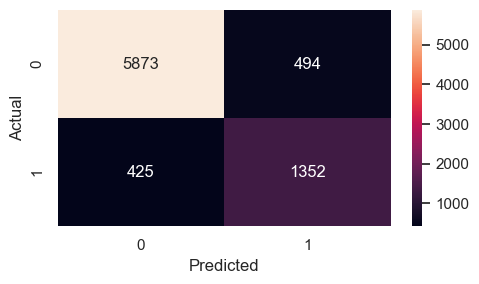

In [53]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=20)
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)
print(f" Accuracy on train data: {dtc.score(X_train, y_train)}")
print(f" Accuracy on test data: {dtc.score(X_test, y_test)}")
print(classification_report(y_test, y_pred_dtc))
confusion(y_test, y_pred_dtc)

## Decision Tree After SMOTE

 Accuracy on train data: 1.0
 Accuracy on test data: 0.8896119842829077
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      6367
           1       0.73      0.77      0.75      1777

    accuracy                           0.89      8144
   macro avg       0.84      0.85      0.84      8144
weighted avg       0.89      0.89      0.89      8144



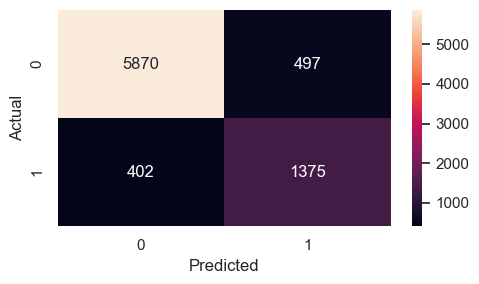

In [54]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=20)
dtc.fit(X_train_resampled, y_train_resampled)

y_pred_dtc = dtc.predict(X_test)
print(f" Accuracy on train data: {dtc.score(X_train_resampled, y_train_resampled)}")
print(f" Accuracy on test data: {dtc.score(X_test, y_test)}")
print(classification_report(y_test, y_pred_dtc))
confusion(y_test, y_pred_dtc)


The decision tree model shows clear signs of overfitting, as seen in its high accuracy on the training data but lower performance on the test data.
Even after addressing class imbalance with SMOTE, the overfitting issue persists.
Therefore, relying solely on the decision tree model may not be a suitable approach.

## Random Forest Befor SMOTE

 Accuracy on train data: 1.0
 Accuracy on test data: 0.9339390962671905
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6367
           1       0.97      0.72      0.83      1777

    accuracy                           0.93      8144
   macro avg       0.95      0.86      0.89      8144
weighted avg       0.94      0.93      0.93      8144



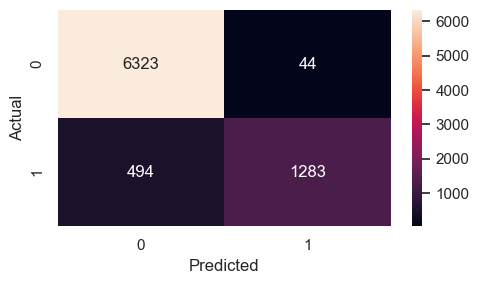

In [55]:
# Applying Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=1008)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print(f" Accuracy on train data: {rfc.score(X_train, y_train)}")
print(f" Accuracy on test data: {rfc.score(X_test, y_test)}")
print(classification_report(y_test, y_pred_rfc))
confusion(y_test, y_pred_rfc)

## Random Forest After SMOTE

 Accuracy on train data: 1.0
 Accuracy on test data: 0.9351669941060904
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6367
           1       0.97      0.73      0.83      1777

    accuracy                           0.94      8144
   macro avg       0.95      0.86      0.90      8144
weighted avg       0.94      0.94      0.93      8144



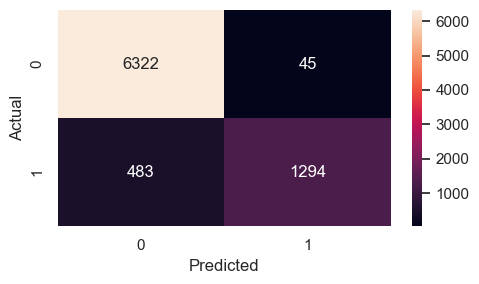

In [56]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=1008)
rfc.fit(X_train_resampled, y_train_resampled)
y_pred_rfc = rfc.predict(X_test)
print(f" Accuracy on train data: {rfc.score(X_train_resampled, y_train_resampled)}")
print(f" Accuracy on test data: {rfc.score(X_test, y_test)}")
print(classification_report(y_test, y_pred_rfc))
confusion(y_test, y_pred_rfc)

In [57]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [2, 4, 6, 8, 10, 12, 16, 20, 22],
    "class_weight": ["balanced", "balanced_subsample"],
    "max_features": ["sqrt", "log2"]
    }

gs_rfc = GridSearchCV(estimator=rfc,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=4,
                           verbose=2)
gs_rfc.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1008),
             n_jobs=4,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 16, 20, 22],
                         'max_features': ['sqrt', 'log2']},
             scoring='accuracy', verbose=2)

In [58]:
gs_rfc.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 22,
 'max_features': 'sqrt'}

## Applying Random Forest with best parameters

 Accuracy on train data: 0.9827933815350389
 Accuracy on test data: 0.9332023575638507
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6367
           1       0.97      0.73      0.83      1777

    accuracy                           0.94      8144
   macro avg       0.95      0.86      0.90      8144
weighted avg       0.94      0.94      0.93      8144



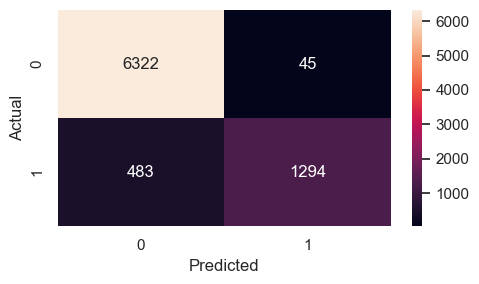

In [59]:
from sklearn.ensemble import RandomForestClassifier

rfc_1 = RandomForestClassifier(class_weight='balanced', criterion='gini',  max_depth=20, max_features= 'sqrt', random_state=14)
rfc_1.fit(X_train_resampled, y_train_resampled)
y_pred_rfc = rfc.predict(X_test)
print(f" Accuracy on train data: {rfc_1.score(X_train_resampled, y_train_resampled)}")
print(f" Accuracy on test data: {rfc_1.score(X_test, y_test)}")
print(classification_report(y_test, y_pred_rfc))
confusion(y_test, y_pred_rfc)

Random forest applied to the data before SMOTE exhibited overfitting on the training data.
After applying SMOTE, the random forest model showed improved performance compared to before SMOTE, with enhanced precision and recall metrics. However, the issue of overfitting persisted.
Utilizing hyperparameters with the random forest model on SMOTE-treated data yielded similar results to the previous scenario, with slightly reduced accuracy on the training data compared to the test data. However, overfitting remained a concern.


## Extreme Gradient Boosting Before SMOTE

 Accuracy on train data: 0.9571428571428572
Accuracy on test_data = 0.9322200392927309
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6367
           1       0.94      0.73      0.83      1777

    accuracy                           0.93      8144
   macro avg       0.94      0.86      0.89      8144
weighted avg       0.93      0.93      0.93      8144



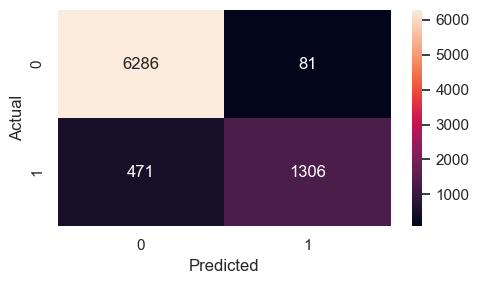

In [64]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 20)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print(f" Accuracy on train data: {xgb.score(X_train, y_train)}")
print(f'Accuracy on test_data = {xgb.score(X_test, y_test)}')
print(classification_report(y_test, y_pred_xgb))
confusion(y_test, y_pred_xgb)

## Extreme Gradient Boosting After SMOTE

 Accuracy on train data: 0.9621454393770856
Accuracy on test_data = 0.9308693516699411
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6367
           1       0.94      0.73      0.82      1777

    accuracy                           0.93      8144
   macro avg       0.94      0.86      0.89      8144
weighted avg       0.93      0.93      0.93      8144



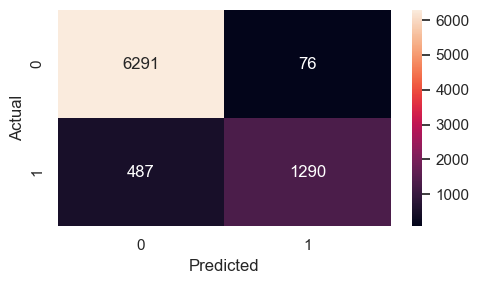

In [65]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 20)
xgb.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb.predict(X_test)

print(f" Accuracy on train data: {xgb.score(X_train_resampled, y_train_resampled)}")
print(f'Accuracy on test_data = {xgb.score(X_test, y_test)}')
print(classification_report(y_test, y_pred_xgb))
confusion(y_test, y_pred_xgb)

## Support Vector Machine Before SMOTE

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100551).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 Accuracy on train data 0.6970528039295948
 Accuracy on test data 0.7070235756385069
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      6367
           1       0.32      0.31      0.32      1777

    accuracy                           0.71      8144
   macro avg       0.57      0.57      0.57      8144
weighted avg       0.70      0.71      0.71      8144



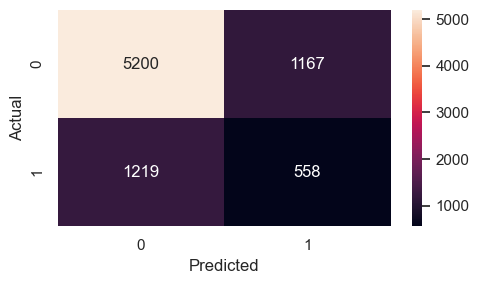

In [66]:
from sklearn.svm import SVC

svc = SVC(max_iter=100551, kernel="linear", random_state=108)

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

print(f" Accuracy on train data {svc.score(X_train, y_train)}")
print(f" Accuracy on test data {svc.score(X_test, y_test)}")
print(classification_report(y_test, y_pred))
confusion(y_test, y_pred)

## Support Vector Machine After SMOTE

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100551).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


 Accuracy on train data 0.6491935483870968
 Accuracy on test data 0.7818025540275049
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      6367
           1       0.00      0.00      0.00      1777

    accuracy                           0.78      8144
   macro avg       0.39      0.50      0.44      8144
weighted avg       0.61      0.78      0.69      8144



C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

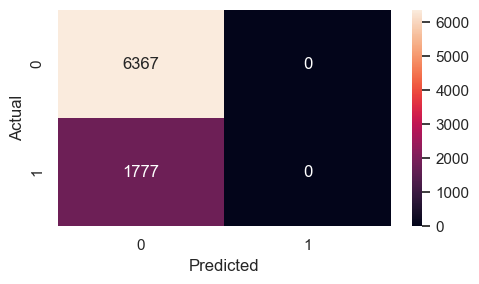

In [67]:
from sklearn.svm import SVC

svc = SVC(max_iter=100551, kernel="linear", random_state=108)

svc.fit(X_train_resampled, y_train_resampled)

y_pred = svc.predict(X_test_scaled)

print(f" Accuracy on train data {svc.score(X_train_resampled, y_train_resampled)}")
print(f" Accuracy on test data {svc.score(X_test_scaled, y_test)}")
print(classification_report(y_test, y_pred))
confusion(y_test, y_pred)

**XGBoost emerged as the ideal model** due to its robust performance, achieving high accuracy and excellent precision-recall balance on both default and non-default classes. Its ability to handle imbalanced data and capture complex patterns makes it highly suitable for real-world loan eligibility prediction.
